In this notebook, I use the CLIP model to perform image–text classification.
I load sample images and a set of text prompts (for example, "a photo of a cat" and "a photo of a dog"), process them
with the CLIP processor, and then use the CLIP model to calculate similarity scores between each image and each text description.
Finally, I identify the most probable class for each image and display its confidence score.

Libraries used:
- Pillow (PIL): to load and handle image files.
- Torch (PyTorch): to manage tensors and run the model computations.
- Transformers (from Hugging Face): to load the CLIP model and its associated processor.

In [131]:
from PIL import Image
from transformers import CLIPProcessor, CLIPModel
import torch

## 0-shot Classification

In [132]:
# import model
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch16")

# import processor
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16") 

In [133]:
# load image
image_name_list = ["cat_cute.png", "dog.png", "cat2.jpg"]

image_list = []
for image_name in image_name_list:
    image_list.append(Image.open(image_name))

In [134]:
# define text classes
text_classes = ["a photo of a cat", "a photo of a dog"]

# pass image and text classes to processor
inputs = processor(text=text_classes, images=image_list, return_tensors="pt", padding=True)

In [135]:
# pass inputs to CLIP
outputs = model(**inputs) #
logits_per_image = outputs.logits_per_image # image-text similarity score
probs = logits_per_image.softmax(dim=1) # convert scores to probabilties via softmax

In [136]:
# print prediction
for i, p in enumerate(probs):  
    idx = int(p.argmax().item())
    print(f"Image {i+1}: {text_classes[idx]} | Probability = {p[idx].item():.4f}")

Image 1: a photo of a cat | Probability = 0.9979
Image 2: a photo of a dog | Probability = 0.9992
Image 3: a photo of a cat | Probability = 0.9997


## Image Search

In [137]:
# list of images to search over
image_name_list = ["cat_cute.png", "dog.png", "goat.png", "cat2.jpg"]

image_list = []
for image_name in image_name_list:
    image_list.append(Image.open(image_name))

In [138]:
query1 = "a cute dog"

query2 = "a cat"

query3 = "a cat on grass"

In [139]:
# pass images and query to CLIP
inputs = processor(text=query1, images=image_list, return_tensors="pt", padding=True)
outputs = model(**inputs)
logits_per_text = outputs.logits_per_text
probs = logits_per_text.softmax(dim=1)

Match probability:  0.9814


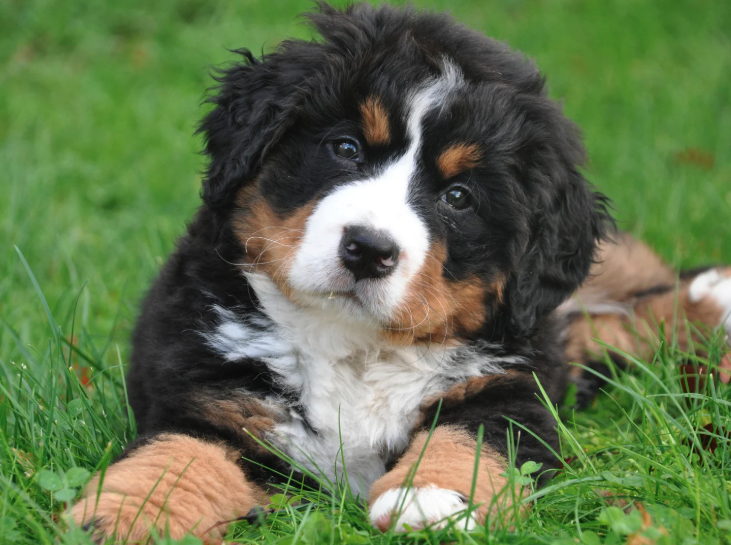

In [140]:
# print best match
best_match = image_list[probs.argmax()]
prob_match = round(float(probs[0][probs.argmax()]),4)

print("Match probability: ",prob_match)
display(best_match)

In [141]:
# pass images and query to CLIP
inputs = processor(text=query2, images=image_list, return_tensors="pt", padding=True)
outputs = model(**inputs)
logits_per_text = outputs.logits_per_text
probs = logits_per_text.softmax(dim=1)

Match probability:  0.686


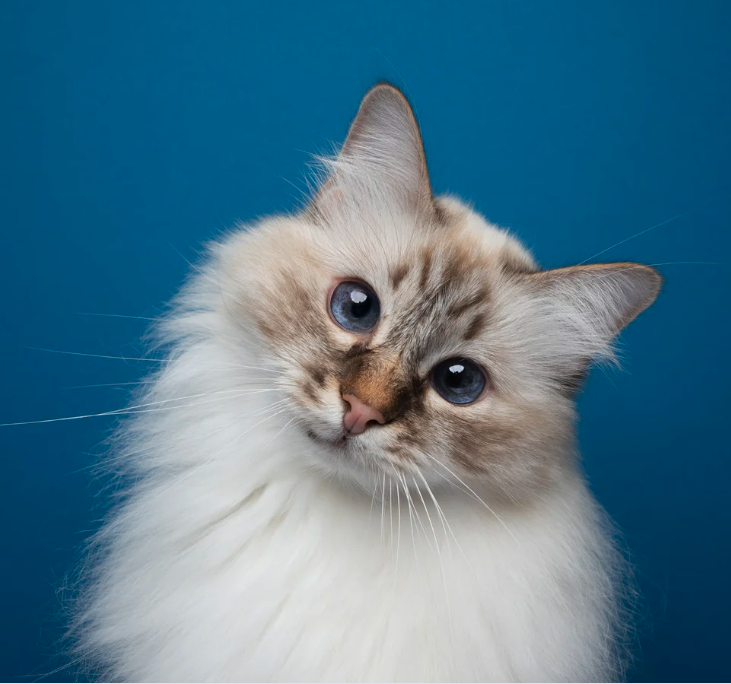

In [142]:
# print best match
best_match = image_list[probs.argmax()]
prob_match = round(float(probs[0][probs.argmax()]),4)

print("Match probability: ",prob_match)
display(best_match)

In [143]:
# pass images and query to CLIP
inputs = processor(text=query3, images=image_list, return_tensors="pt", padding=True)
outputs = model(**inputs)
logits_per_text = outputs.logits_per_text
probs = logits_per_text.softmax(dim=1)

Match probability:  0.999


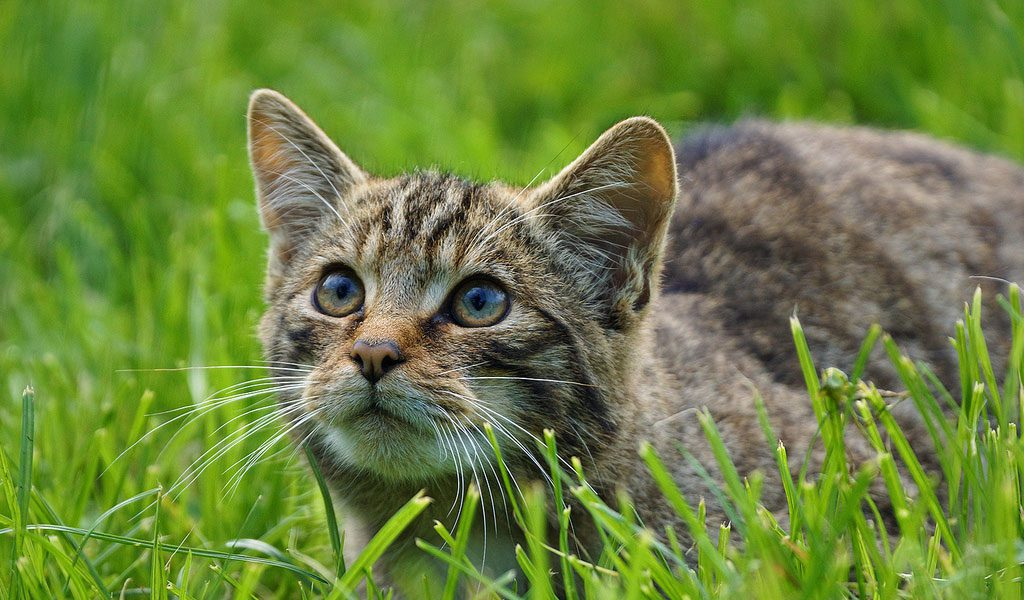

In [144]:
# print best match
best_match = image_list[probs.argmax()]
prob_match = round(float(probs[0][probs.argmax()]),4)

print("Match probability: ",prob_match)
display(best_match)